In [48]:
# Upgrade environment to support TF 2.10 in Colab
!pip install -U --pre tensorflow tensorflow_datasets
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2
#!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libcudnn8 is already the newest version (8.1.0.77-1+cuda11.2).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.


In [49]:
#pip install --upgrade pip

In [50]:
#from google.colab import drive
#drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
#import os
import pathlib

import pandas as pd
import matplotlib.pyplot as plt
#import sys
import numpy as np
#!{sys.executable} -m pip install matplotlib
import tensorflow as tf
import seaborn as sns
import keras.api._v2.keras as keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import LSTM,Dense

import librosa
from scipy.io import wavfile
import keras


#from tensorflow.keras.layers.experimental import preprocessing

from tensorflow import keras


from IPython import display

#set seed value for experiment reproductibility
#seed=42
#tf.random.set_seed(seed)
#np.random.seed(seed)



In [52]:
!pip install wavfile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
#DATASET_PATH='/content/drive/MyDrive/MIVIA_ROAD_DB1/audio'
#data_dir = pathlib.Path(DATASET_PATH)


In [54]:
audio_csv = pd.read_csv('/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/audio.csv')
frame = pd.DataFrame(audio_csv)
frame.head()
print(frame)


                                              PATHNAME  CLASS_ID CLASS_NAME  \
0    /content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wa...         2   0046.wav   
1    /content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wa...         3   0038.wav   
2    /content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wa...         2   0022.wav   
3    /content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wa...         2   0030.wav   
4    /content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wa...         2   0057.wav   
..                                                 ...       ...        ...   
396  /content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wa...         2   0032.wav   
397  /content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wa...         2   0039.wav   
398  /content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wa...         2   0015.wav   
399  /content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wa...         2   0027.wav   
400  /content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wa...         3   0046.wav   

     STARTSECOND  ENDSECOND      category    length

In [55]:
!pip install ffmpeg-python
!pip install pydub


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The expected outcome of the provided code below is that it will iterate through each file path in the 'PATHNAME' column of the dataframe 'df' , concatenate the file path with the file name, check if the file exist at this path using os.path.exists(), if the file does exist it will load the audio file and then extract the duration of the audio file and store it in a new column 'length' of the dataframe 'df' at the same index as the file path. And if the file does not exist, it will print a message indicating the non-existent file path.

You will get a DataFrame with a new column 'length' that contains the duration of the audio file for each file that exists on the provided path. The function should also print a message for each file that doesn't exist at the specified path.

In [56]:
#separating the data into various fractions

cut = pd.read_csv('/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/audio.csv')
#print(cut.columns)
df = pd.DataFrame(cut)
df = df.set_index('PATHNAME')
import os
for i in df.index:
    filepath = "/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles/"+i
    if os.path.exists(filepath):
        sounds, sr =  librosa.load(filepath)
        df.at[i,'length']= sounds.shape[0]/sr
    else:
        print(f"{filepath} does not exist")
df

/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles//content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles/0046.wav does not exist
/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles//content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles/0038.wav does not exist
/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles//content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles/0022.wav does not exist
/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles//content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles/0030.wav does not exist
/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles//content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles/0057.wav does not exist
/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles//content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles/0038.wav does not exist
/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles//content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles/0015.wav does not exist
/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles//content/drive/MyDrive/MIVIA_ROAD_DB1

,CLASS_ID,CLASS_NAME,STARTSECOND,ENDSECOND,category,length
PATHNAME,,,,,,
/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles/0046.wav,2,0046.wav,6.000000,6.957732,tireskidding,0.957732
/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles/0038.wav,3,0038.wav,14.000776,15.126803,carcrash,1.126027
/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles/0022.wav,2,0022.wav,25.126825,27.535374,tireskidding,2.408549
/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles/0030.wav,2,0030.wav,28.000000,29.000000,tireskidding,1.000000
/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles/0057.wav,2,0057.wav,6.000000,9.000000,tireskidding,3.000000
...,...,...,...,...,...,...
/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles/0032.wav,2,0032.wav,6.000000,7.441723,tireskidding,1.441723
/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles/0039.wav,2,0039.wav,14.441746,15.406440,tireskidding,0.964694
/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles/0015.wav,2,0015.wav,5.000000,7.406440,tireskidding,2.406440


In [57]:
tire_skidding = df.query("CLASS_ID==2")
print(tire_skidding)

                                                    CLASS_ID CLASS_NAME  \
PATHNAME                                                                  
/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wav...         2   0046.wav   
/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wav...         2   0022.wav   
/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wav...         2   0030.wav   
/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wav...         2   0057.wav   
/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wav...         2   0038.wav   
...                                                      ...        ...   
/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wav...         2   0015.wav   
/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wav...         2   0032.wav   
/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wav...         2   0039.wav   
/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wav...         2   0015.wav   
/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wav...         2   0027.wav   

                        

In [59]:
import csv
import os
from pydub import AudioSegment
import numpy as np

csv_path = '/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/audio.csv'
audio_dir = '/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles' 

def extract_audio_segments(csv_path, audio_dir):
    segments_2 = []
    segments_3 = []

    with open(csv_path,newline='') as f:
        reader = csv.reader(f)
        next(reader)
        for row in reader:
            PATHNAME = row[0]
            CLASS_ID = int(row[1])
            STARTSECOND = float(row[3])
            ENDSECOND = float(row[4])

            audio_file = os.path.join(audio_dir, PATHNAME)
            
            if not os.path.exists(audio_file):
                print(f"File not found: {audio_file}")
                continue
            
            audio = AudioSegment.from_file(audio_file, format='wav')

            start_ms = STARTSECOND * 1000
            end_ms = ENDSECOND * 1000
            segment = audio[start_ms:end_ms]

            if CLASS_ID == 2:
                segments_2.append(segment)
            elif CLASS_ID == 3:
                segments_3.append(segment)

    for i, segment in enumerate(segments_2):
        segment.export(f"/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/tireskidding/class_2_segment_{i}.wav", format="wav")

    for i, segment in enumerate(segments_3):
        segment.export(f"/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/carcrash/class_3_segment_{i}.wav", format="wav")

extract_audio_segments(csv_path, audio_dir)


In [60]:
import os
if os.path.isfile("/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/tireskidding/tire_skidding.csv"):
    print("File exists")
else:
    print("File not found")

File not found


In [61]:
def envelope(y, rate, threshold):
    mask = []
    y = pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10), min_periods=1, center=True).mean()
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

tire_skidding = df.query("CLASS_ID==2")
tire_skidding.to_csv("/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/tireskidding/tire_skidding.csv")
tire_skidding_csv = pd.read_csv("/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/tireskidding/tire_skidding.csv")
tire_skidding_df = pd.DataFrame(tire_skidding_csv)
tire_skidding_df.set_index("PATHNAME", inplace=True)

if not os.path.exists("/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/tireskidding"):
    os.makedirs("/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/tireskidding")

missing_files = []
for i in tire_skidding_df.index:
    filepath = "/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles/"+i
    if os.path.exists(filepath):
        sample_rate, skidding_cut = wavfile.read(filepath)
        mask = envelope(skidding_cut, sample_rate, 0.0005)
        if mask is not None:
            if len(np.where(np.array(mask) == True)[0]) > 0:
                wavfile.write(filename='/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/tireskidding/'+i, rate=sample_rate, data=skidding_cut[np.where(np.array(mask) == True)[0]].astype(np.int16))
        else:
            wavfile.write(filename='/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/tireskidding/'+i, rate=sample_rate, data=skidding_cut.astype(np.int16))
    else:
        missing_files.append(filepath)

if len(missing_files)>0:
    print(f"Missing files: {missing_files}")
print(tire_skidding_df.head())

Missing files: ['/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles//content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles/0046.wav', '/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles//content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles/0022.wav', '/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles//content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles/0030.wav', '/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles//content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles/0057.wav', '/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles//content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles/0038.wav', '/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles//content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles/0056.wav', '/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles//content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles/0016.wav', '/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles//content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles/0030.wav', '/content/drive/MyDrive/MIVIA_ROAD_DB1/a

In [62]:
if not os.path.exists("/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/carcrash"):
    os.makedirs("/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/carcrash")

In [63]:
carcrash = df.query("CLASS_ID==3")
carcrash.to_csv("/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/carcrash/carcrash.csv")
carcrash_csv = pd.read_csv('/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/carcrash/carcrash.csv')
carcrash_df = pd.DataFrame(carcrash_csv)
carcrash_df.set_index('PATHNAME', inplace=True)

missing_files=[]
for i in carcrash_df.index:
   filepath = '/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles/'+i
   if os.path.exists(filepath):
      sample_rate, skidding_cut  = wavfile.read(filepath)
      wavfile.write(filename='/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/carcrash/'+i, rate= 44100, data=skidding_cut.astype(np.int16))
carcrash_df

,CLASS_ID,CLASS_NAME,STARTSECOND,ENDSECOND,category,length
PATHNAME,,,,,,
/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles/0038.wav,3,0038.wav,14.000776,15.126803,carcrash,1.126027
/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles/0015.wav,3,0015.wav,40.000000,45.000000,carcrash,5.000000
/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles/0021.wav,3,0021.wav,6.000000,9.000000,carcrash,3.000000
/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles/0039.wav,3,0039.wav,21.000000,24.000000,carcrash,3.000000
/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles/0053.wav,3,0053.wav,24.000000,27.000000,carcrash,3.000000
...,...,...,...,...,...,...
/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles/0008.wav,3,0008.wav,49.496417,52.336168,carcrash,2.839751
/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles/0039.wav,3,0039.wav,21.177052,23.141746,carcrash,1.964694
/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/Wavfiles/0007.wav,3,0007.wav,37.077075,42.999751,carcrash,5.922676


In [110]:
import os

clean_data_path = '/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/CleanData'
if not os.path.exists(clean_data_path):
    os.makedirs(clean_data_path)


sounds = np.array(tf.io.gfile.listdir('/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/CleanData'))
# sounds = sounds[sounds!="Audio"]
sounds = sounds[sounds!=".ipynb_checkpoints"]
# #sounds = sounds[sounds!="main.py"]
# sounds = sounds[sounds!="cutting.csv"]
# sounds = sounds[sounds!="esc50.csv"]
print(sounds)

['carcrash' 'tireskidding']


In [112]:
train_ds, val_ds = tf.keras.utils.audio_dataset_from_directory(
    directory="/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/CleanData",
    batch_size=64,
    validation_split=0.2,
    seed=0,
    output_sequence_length=64000,
    subset='both')

label_names = np.array(train_ds.class_names)
print()
print("label names:", label_names)


Found 401 files belonging to 2 classes.
Using 321 files for training.
Using 80 files for validation.

label names: ['carcrash' 'tireskidding']


In [113]:
train_ds.element_spec


(TensorSpec(shape=(None, 64000, None), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [114]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 64000, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [115]:
def squeeze(audio, labels):
  audio = tf.squeeze(audio, axis=-1)
  return audio, labels

train_ds = train_ds.map(squeeze, tf.data.AUTOTUNE)
val_ds = val_ds.map(squeeze, tf.data.AUTOTUNE)
print(train_ds)

<_ParallelMapDataset element_spec=(TensorSpec(shape=(None, 64000), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [116]:
test_ds = val_ds.shard(num_shards=2, index=0)
val_ds = val_ds.shard(num_shards=2, index=1)


Returns the first item of the dataset. It can be use to inspect the data without iterating through the entire dataset, it's a good way to check the format and the structure of the data in the dataset, also useful to debug the data loading and preprocessing step.

In [117]:
train_ds.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 64000), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [118]:
for example_audio, example_labels in train_ds.take(1):  
  print(example_audio.shape)
  print(example_labels.shape)

(64, 64000)
(64,)


In [119]:
label_names[[0,1]]


array(['carcrash', 'tireskidding'], dtype='<U12')

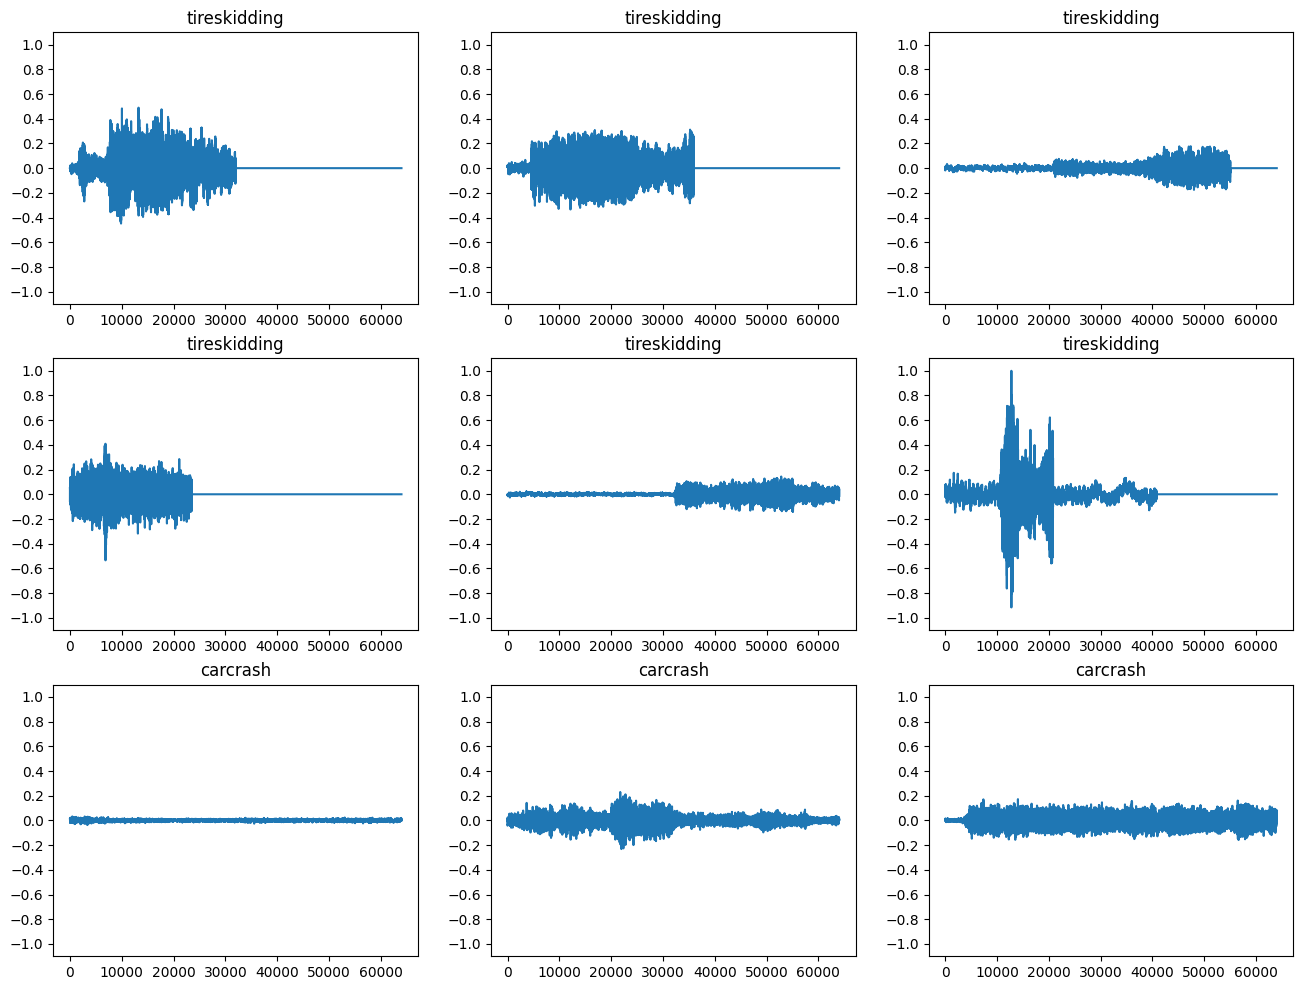

In [120]:
rows = 3
cols = 3
n = rows * cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 12))

for i in range(n):
  if i>=n:
    break
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  ax.plot(example_audio[i].numpy())
  ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
  label = label_names[example_labels[i]]
  ax.set_title(label)
  ax.set_ylim([-1.1,1.1])

plt.show()

In [121]:
#Convert Waveforms to spectograms
#The waveforms in the dataset are represented in the time domain by 
#computing the short-time Fourier transform (STFT). 
#This transforms the waveforms into spectrograms, 
#which show frequency changes over time and can be represented as 2D images. 
#You will feed the spectrogram images into your neural network to train the model.

def get_spectrogram(waveform):
  # Convert the waveform to a spectrogram via a STFT.
  spectrogram = tf.signal.stft(
      waveform, frame_length=255, frame_step=1024)
  # Obtain the magnitude of the STFT.
  spectrogram = tf.abs(spectrogram)
  # Add a `channels` dimension, so that the spectrogram can be used
  # as image-like input data with convolution layers (which expect
  # shape (`batch_size`, `height`, `width`, `channels`).
  spectrogram = spectrogram[..., tf.newaxis]
  return spectrogram

In [122]:
for i in range(3):
  label = label_names[example_labels[i]]
  waveform = example_audio[i]
  spectrogram = get_spectrogram(waveform)

  print('Label:', label)
  print('Waveform shape:', waveform.shape)
  print('Spectrogram shape:', spectrogram.shape)
  print('Audio playback')
  display.display(display.Audio(waveform, rate=16000))

Label: tireskidding
Waveform shape: (64000,)
Spectrogram shape: (63, 129, 1)
Audio playback


Label: tireskidding
Waveform shape: (64000,)
Spectrogram shape: (63, 129, 1)
Audio playback


Label: tireskidding
Waveform shape: (64000,)
Spectrogram shape: (63, 129, 1)
Audio playback


a function for displaying a spectrogram

In [123]:
def plot_spectrogram(spectrogram, ax):
  if len(spectrogram.shape) > 2:
    assert len(spectrogram.shape) == 3
    spectrogram = np.squeeze(spectrogram, axis=-1)
  # Convert the frequencies to log scale and transpose, so that the time is
  # represented on the x-axis (columns).
  # Add an epsilon to avoid taking a log of zero.
  log_spec = np.log(spectrogram.T + np.finfo(float).eps)
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec)


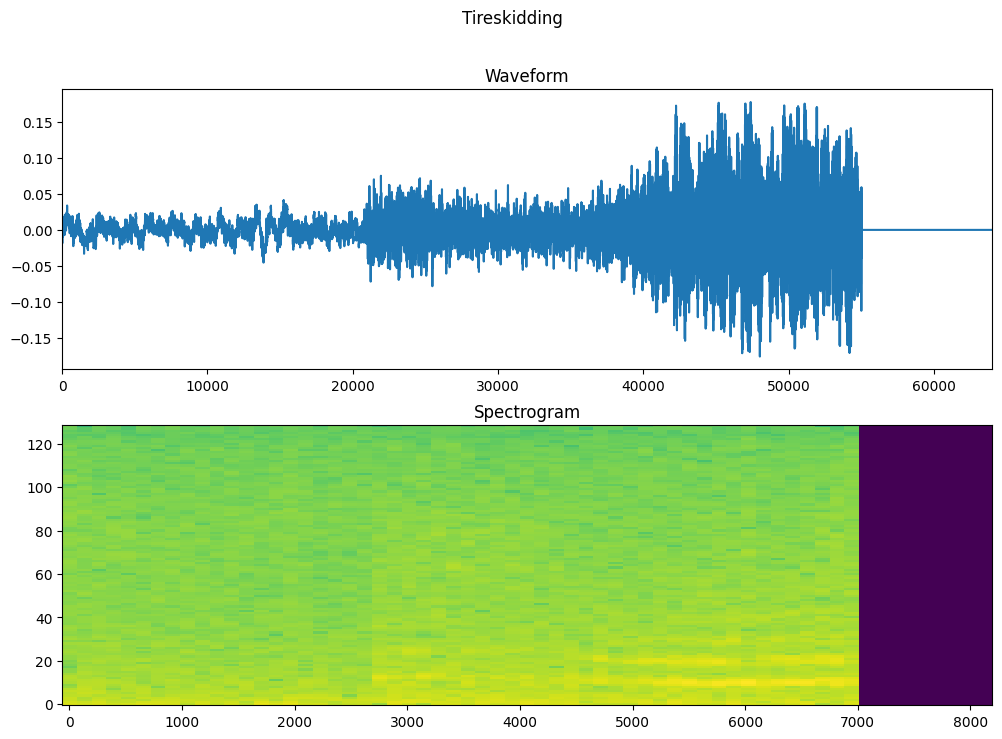

In [124]:
fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(waveform.shape[0])
axes[0].plot(timescale, waveform.numpy())
axes[0].set_title('Waveform')
axes[0].set_xlim([0, 64000])

plot_spectrogram(spectrogram.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.suptitle(label.title())
plt.show()


 spectrogram datasets from the audio *datasets*

In [125]:
def make_spec_ds(ds):
  return ds.map(
      map_func=lambda audio,label: (get_spectrogram(audio), label),
      num_parallel_calls=tf.data.AUTOTUNE)


In [126]:
train_spectrogram_ds = make_spec_ds(train_ds)
val_spectrogram_ds = make_spec_ds(val_ds)
test_spectrogram_ds = make_spec_ds(test_ds)


Examine the spectrograms for different examples of the dataset

In [127]:
for example_spectrograms, example_spect_labels in train_spectrogram_ds.take(1):
  break


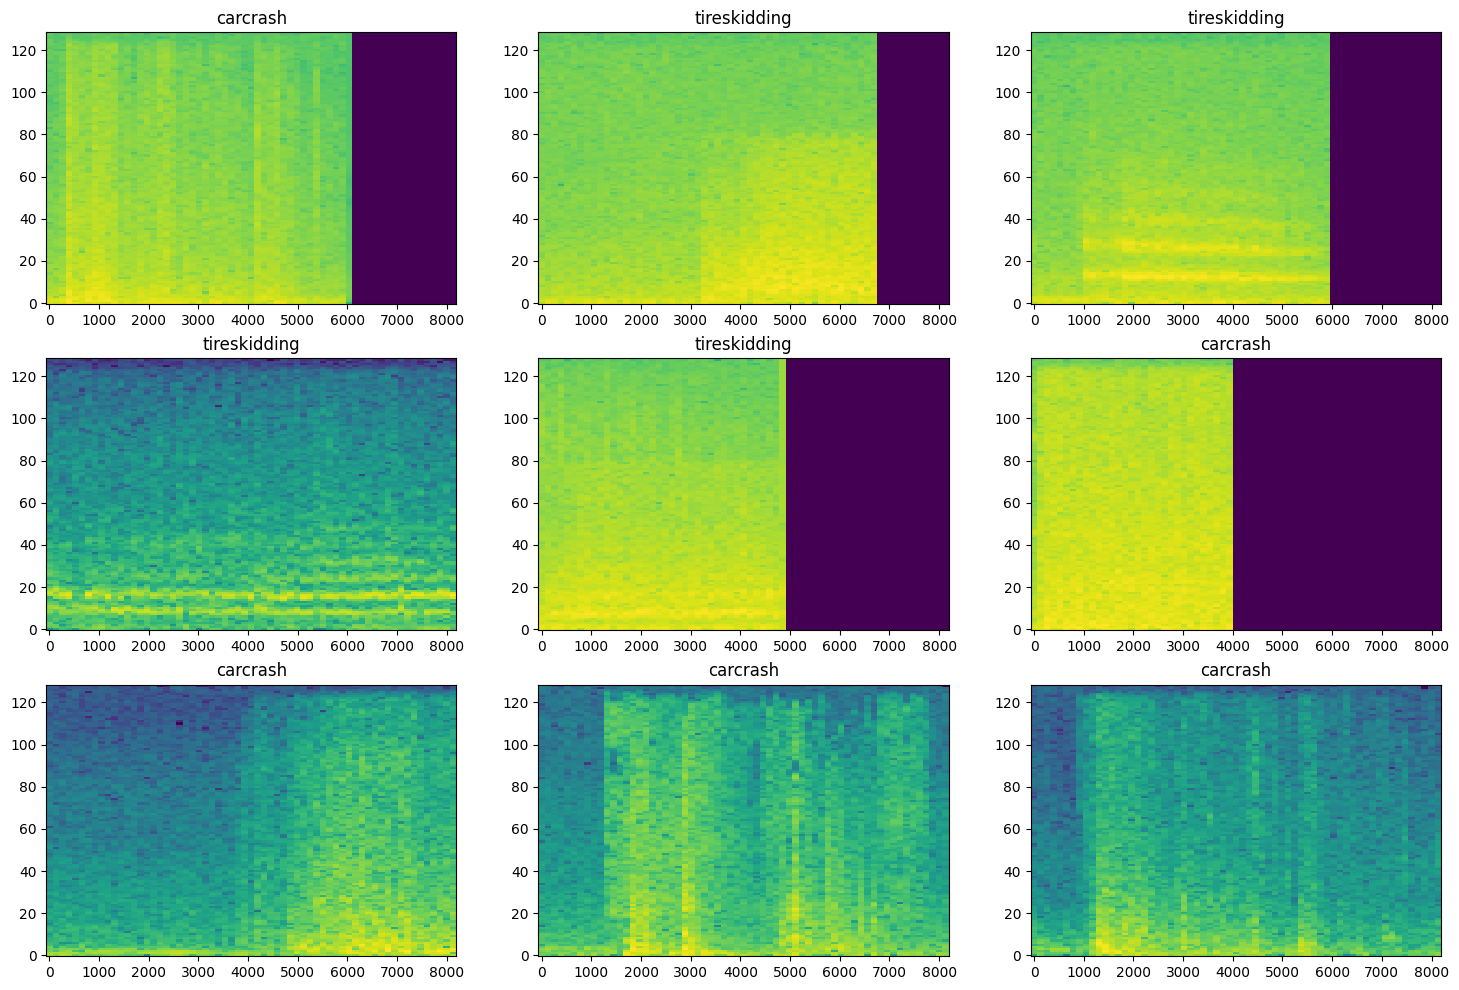

In [128]:
rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(18, 12))

for i in range(n):
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    plot_spectrogram(example_spectrograms[i].numpy(), ax)
    ax.set_title(sounds[example_spect_labels[i].numpy()])

plt.show()


Build and train the model.Add Dataset.cache and Dataset.prefetch operations to reduce read latency while training the model:

In [129]:
train_spectrogram_ds = train_spectrogram_ds.cache().shuffle(10000).prefetch(tf.data.AUTOTUNE)
val_spectrogram_ds = val_spectrogram_ds.cache().prefetch(tf.data.AUTOTUNE)
test_spectrogram_ds = test_spectrogram_ds.cache().prefetch(tf.data.AUTOTUNE)


a simple convolutional neural network (CNN), since you have transformed the audio files into spectrogram images.

In [130]:
input_shape = example_spectrograms.shape[1:]
print('Input shape:', input_shape)
num_labels = len(sounds)

# Instantiate the `tf.keras.layers.Normalization` layer.
norm_layer = layers.Normalization()
# Fit the state of the layer to the spectrograms
# with `Normalization.adapt`.
norm_layer.adapt(data=train_spectrogram_ds.map(map_func=lambda spec, label: spec))

model = models.Sequential([
    layers.Input(shape=input_shape),
    # Downsample the input.
    layers.Resizing(32, 32),
    # Normalize.
    norm_layer,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_labels),
])

model.summary()


Input shape: (63, 129, 1)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_3 (Resizing)       (None, 32, 32, 1)         0         
                                                                 
 normalization_4 (Normalizat  (None, 32, 32, 1)        3         
 ion)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)        

Configure the Keras model with the Adam optimizer and the cross-entropy loss

In [131]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)


Train the model over 10 epochs for demonstration purposes

In [132]:
EPOCHS = 20
history = model.fit(
    train_spectrogram_ds,
    validation_data=val_spectrogram_ds,
    epochs=EPOCHS,
    callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss',verbose=1, patience=2),
)


Epoch 1/20
6/6 [==============================] - 4s 500ms/step - loss: 0.6879 - accuracy: 0.6449 - val_loss: 0.4410 - val_accuracy: 0.6875
Epoch 2/20
6/6 [==============================] - 2s 359ms/step - loss: 0.4208 - accuracy: 0.8037 - val_loss: 0.3623 - val_accuracy: 0.8125
Epoch 3/20
6/6 [==============================] - 2s 373ms/step - loss: 0.2617 - accuracy: 0.8660 - val_loss: 0.2299 - val_accuracy: 0.8750
Epoch 4/20
6/6 [==============================] - 2s 263ms/step - loss: 0.2066 - accuracy: 0.9346 - val_loss: 0.2083 - val_accuracy: 0.9375
Epoch 5/20
6/6 [==============================] - 1s 197ms/step - loss: 0.1381 - accuracy: 0.9688 - val_loss: 0.2033 - val_accuracy: 0.9375
Epoch 6/20
6/6 [==============================] - 1s 189ms/step - loss: 0.1298 - accuracy: 0.9688 - val_loss: 0.1984 - val_accuracy: 0.9375
Epoch 7/20
6/6 [==============================] - 1s 187ms/step - loss: 0.1106 - accuracy: 0.9688 - val_loss: 0.2066 - val_accuracy: 0.9375
Epoch 8/20
6/6 [====

 plot the training and validation loss curves to check how your model has improved during training:

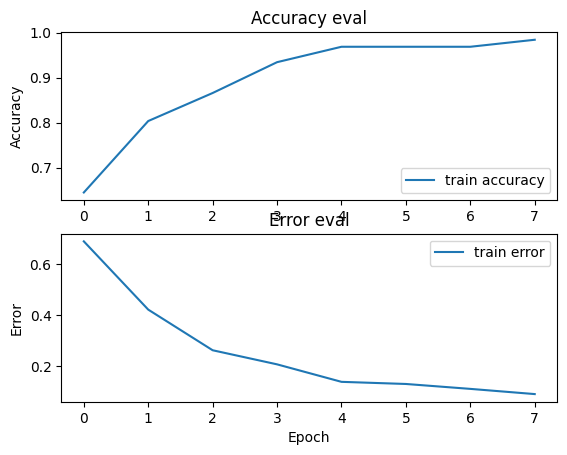

In [133]:
def plot_history(history):
 

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    # axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    
    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    # axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()
plot_history(history)

Evaluate the model performance

In [134]:
model.evaluate(test_spectrogram_ds, return_dict=True)


1/1 [==============================] - 0s 438ms/step - loss: 0.3178 - accuracy: 0.9219


{'loss': 0.3177577257156372, 'accuracy': 0.921875}

In [135]:
model.save("Accident.h5")

In [136]:
y_pred = model.predict(test_spectrogram_ds)


1/1 [==============================] - 0s 161ms/step


In [137]:
y_pred = tf.argmax(y_pred, axis=1)


In [138]:
y_true = tf.concat(list(test_spectrogram_ds.map(lambda s,lab: lab)), axis=0)


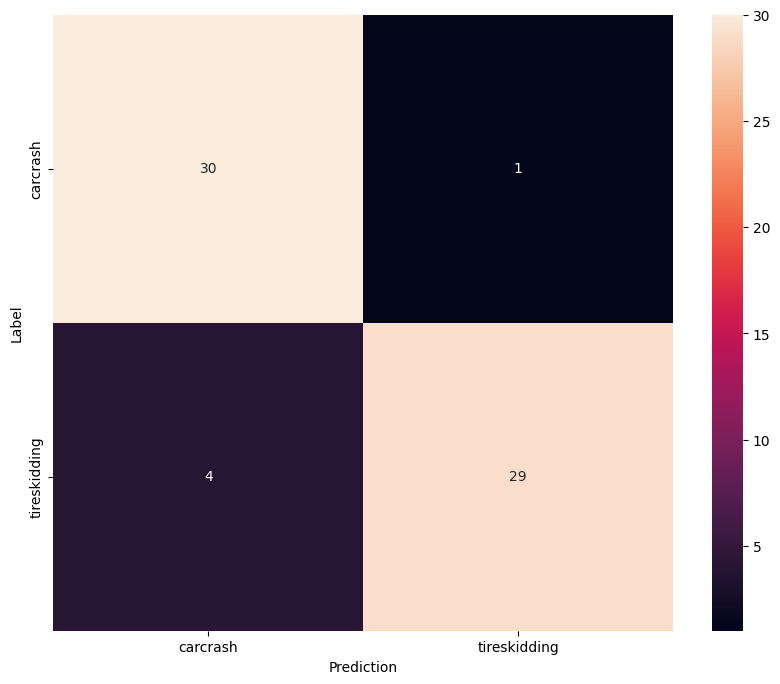

In [139]:
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=label_names,
            yticklabels=label_names,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

tf.Tensor([[-4.150839   2.8541772]], shape=(1, 2), dtype=float32)


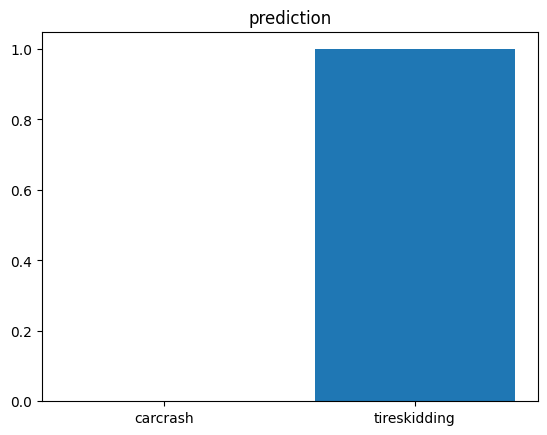

In [140]:
x = '/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/CleanData/tireskidding/class_2_segment_4.wav'
x = tf.io.read_file(str(x))
x, sample_rate = tf.audio.decode_wav(x, desired_channels=1, desired_samples=64000,)
x = tf.squeeze(x, axis=-1)
waveform = x
x = get_spectrogram(x)
x = x[tf.newaxis,...]

prediction = model(x)
print(prediction)
plt.bar(sounds, tf.nn.softmax(prediction[0]))
plt.title('prediction')
plt.show()

display.display(display.Audio(waveform, rate=64000))

In [145]:
#inferencing the model to run on IOT device

class ExportModel(tf.Module):
  def __init__(self, model):
    self.model = model

    # Accept either a string-filename or a batch of waveforms.
    # YOu could add additional signatures for a single wave, or a ragged-batch. 
    self.__call__.get_concrete_function(
        x=tf.TensorSpec(shape=(), dtype=tf.string))
    self.__call__.get_concrete_function(
       x=tf.TensorSpec(shape=[None, 64000], dtype=tf.float32))


  @tf.function
  def __call__(self, x):
    # If they pass a string, load the file and decode it. 
    if x.dtype == tf.string:
      x = tf.io.read_file(x)
      x, _ = tf.audio.decode_wav(x, desired_channels=1, desired_samples=64000,)
      x = tf.squeeze(x, axis=-1)
      x = x[tf.newaxis, :]

    x = get_spectrogram(x)  
    result = self.model(x, training=False)

    class_ids = tf.argmax(result, axis=-1)
    class_names = tf.gather(label_names, class_ids)
    return {'predictions':result,
            'class_ids': class_ids,
            'class_names': class_names}

In [146]:
export = ExportModel(model)
export(tf.constant('/content/drive/MyDrive/MIVIA_ROAD_DB1/audio/CleanData/carcrash/class_3_segment_1.wav'))

{'predictions': <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[ 3.884865 , -2.4647043]], dtype=float32)>,
 'class_ids': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([0])>,
 'class_names': <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'carcrash'], dtype=object)>}

In [147]:
tf.saved_model.save(export, "saved")
imported = tf.saved_model.load("saved")
imported(waveform[tf.newaxis, :])

{'class_ids': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([1])>,
 'predictions': <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-4.150839 ,  2.8541772]], dtype=float32)>,
 'class_names': <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'tireskidding'], dtype=object)>}